In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ImportError: No module named pandas

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
train = pd.read_csv('train.csv')

In [26]:
train.head(5)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [27]:
train.tail(5)

,DateTime,Junction,Vehicles,ID
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [28]:
train.Junction.unique()

array([1, 2, 3, 4])

In [29]:
train.Vehicles.unique()

array([ 15,  13,  10,   7,   9,   6,   8,  11,  12,  17,  16,  20,  19,
        14,  22,  32,  31,  35,  26,  34,  30,  27,  24,  29,  21,  18,
        33,  28,  25,  23,  40,  38,  36,  48,  43,  41,  37,  39,  42,
        44,  47,  50,  45,  46,  70,  54,  52,  55,  49,  58,  64,  62,
        51,  53,  61,  56,  57,  63,  59,  60,  67,  76,  79,  66,  65,
        68,  69,  86,  73,  77,  74,  71,  72,  78,   5,  81,  75,  80,
        82,  89,  83,  93,  91,  85,  90,  84,  87,  94,  92, 106,  98,
        88,  96, 120,  97, 104,  95, 100, 112, 103, 105, 143, 134, 135,
       141, 156, 110, 102,  99, 132, 124, 113, 109, 115, 101, 108, 114,
       107, 111, 136, 129, 118, 116, 123, 133, 128, 117, 121, 127, 140,
       126, 122, 119,   2,   4,   3,   1, 125, 180, 173, 162])

In [30]:
len(train.Vehicles.unique())

141

In [31]:
len(train)

48120

In [32]:
train.ID.unique()

array([20151101001, 20151101011, 20151101021, ..., 20170630214,
       20170630224, 20170630234])

In [33]:
48120/4

12030

Junction - 01 || 00000 [2015-11-01 00:00:00] -> 14591 [2017-06-30 23:00:00] || 14591
Junction - 02 || 14592 [2015-11-01 00:00:00] -> 29183 [2017-06-30 23:00:00] ||
Junction - 03 || 29184 [2015-11-01 00:00:00] -> 43775 [2017-06-30 23:00:00] ||
Junction - 04 || 43776 [2017-01-01 00:00:00] -> 48119 [2017-06-30 23:00:00] || 

In [34]:
train.iloc[48119]

DateTime    2017-06-30 23:00:00
Junction                      4
Vehicles                     12
ID                  20170630234
Name: 48119, dtype: object

In [35]:
J1 = train.iloc[0:14592]
J2 = train.iloc[14592:29184]
J3 = train.iloc[29184:43776]
J4 = train.iloc[43776:48120]

In [36]:
print "J1 :",len(J1)
print "J2 :",len(J2)
print "J3 :",len(J3)
print "J4 :",len(J4)

J1 : 14592
J2 : 14592
J3 : 14592
J4 : 4344


In [37]:
J1.drop('ID',inplace=True,axis = 1);
J2.drop('ID',inplace=True,axis = 1);
J3.drop('ID',inplace=True,axis = 1);
J4.drop('ID',inplace=True,axis = 1);

/Users/akhilpunia/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/akhilpunia/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/akhilpunia/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from

In [38]:
J1d = J1['DateTime']
J2d = J2['DateTime']
J3d = J3['DateTime']
J4d = J4['DateTime']
J1.drop('DateTime',inplace=True,axis = 1);
J2.drop('DateTime',inplace=True,axis = 1);
J3.drop('DateTime',inplace=True,axis = 1);
J4.drop('DateTime',inplace=True,axis = 1);

/Users/akhilpunia/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/akhilpunia/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/akhilpunia/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/akhilpunia/anaconda/envs/py27/lib/python2.7/sit

## 1.0 Junction 01

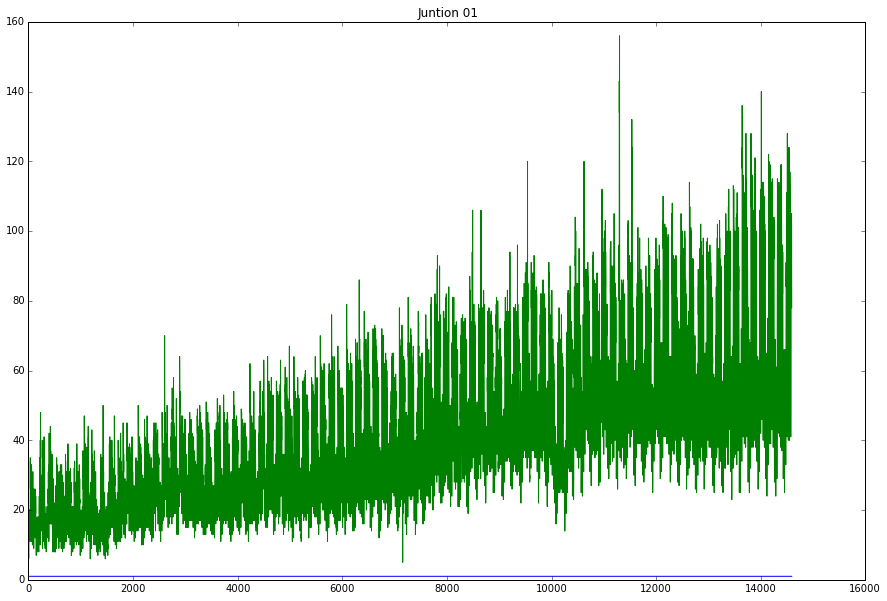

In [40]:
plt.figure(figsize=(15,10))
plt.title('Juntion 01')
plt.plot(J1)
plt.show()

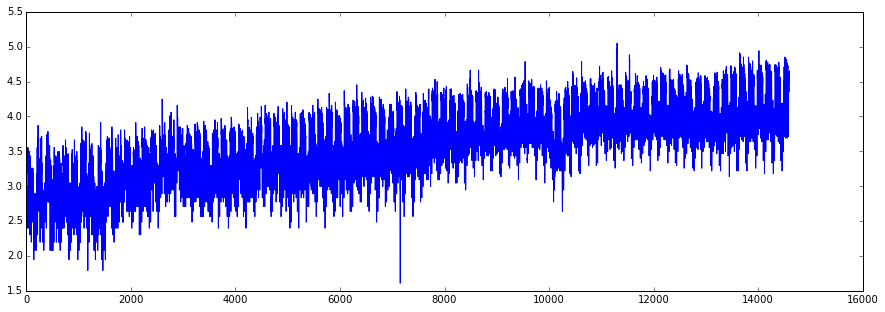

In [139]:
plt.figure(figsize=(15,5))
ts = [J1.iloc[i]['Vehicles'] for i in range(0,14592)]
ts_log = np.log(ts)
plt.plot(ts_log)

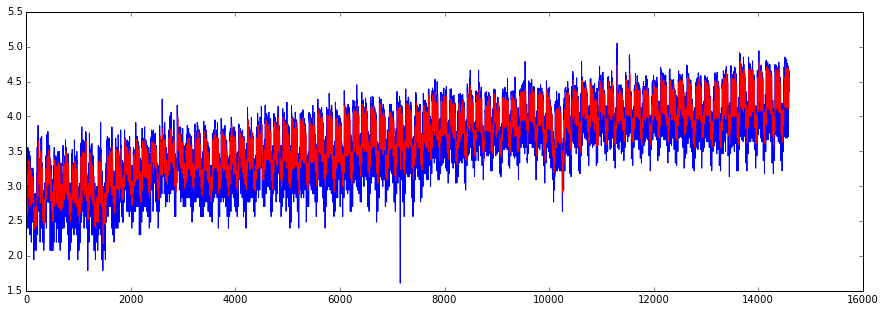

In [140]:
plt.figure(figsize=(15,5))
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

### Spliiting into 24 H Time series

In [164]:
def analysis(J1,d):
    fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 40))

    y = [i for i in range(0,d/24)]

    #fig.title('Junction-01-24H-TimeSeries')

    x = [J1.iloc[i]['Vehicles'] for i in range(0,d,24)]
    axes[0,0].set_title('Juntion 01 - [00:00:00]')
    axes[0,0].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(1,d,24)]
    axes[0,1].set_title('Juntion 01 - [01:00:00]')
    axes[0,1].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(2,d,24)]
    axes[0,2].set_title('Juntion 01 - [02:00:00]')
    axes[0,2].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(3,d,24)]
    axes[1,0].set_title('Juntion 01 - [03:00:00]')
    axes[1,0].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(4,d,24)]
    axes[1,1].set_title('Juntion 01 - [04:00:00]')
    axes[1,1].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(5,d,24)]
    axes[1,2].set_title('Juntion 01 - [05:00:00]')
    axes[1,2].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(6,d,24)]
    axes[2,0].set_title('Juntion 01 - [06:00:00]')
    axes[2,0].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(7,d,24)]
    axes[2,1].set_title('Juntion 01 - [07:00:00]')
    axes[2,1].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(8,d,24)]
    axes[2,2].set_title('Juntion 01 - [08:00:00]')
    axes[2,2].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(9,d,24)]
    axes[3,0].set_title('Juntion 01 - [09:00:00]')
    axes[3,0].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(10,d,24)]
    axes[3,1].set_title('Juntion 01 - [10:00:00]')
    axes[3,1].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(11,d,24)]
    axes[3,2].set_title('Juntion 01 - [11:00:00]')
    axes[3,2].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(12,d,24)]
    axes[4,0].set_title('Juntion 01 - [12:00:00]')
    axes[4,0].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(13,d,24)]
    axes[4,1].set_title('Juntion 01 - [13:00:00]')
    axes[4,1].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(14,d,24)]
    axes[4,2].set_title('Juntion 01 - [14:00:00]')
    axes[4,2].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(15,d,24)]
    axes[5,0].set_title('Juntion 01 - [15:00:00]')
    axes[5,0].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(16,d,24)]
    axes[5,1].set_title('Juntion 01 - [16:00:00]')
    axes[5,1].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(17,d,24)]
    axes[5,2].set_title('Juntion 01 - [17:00:00]')
    axes[5,2].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(18,d,24)]
    axes[6,0].set_title('Juntion 01 - [18:00:00]')
    axes[6,0].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(19,d,24)]
    axes[6,1].set_title('Juntion 01 - [19:00:00]')
    axes[6,1].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(20,d,24)]
    axes[6,2].set_title('Juntion 01 - [20:00:00]')
    axes[6,2].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(21,d,24)]
    axes[7,0].set_title('Juntion 01 - [21:00:00]')
    axes[7,0].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(22,d,24)]
    axes[7,1].set_title('Juntion 01 - [22:00:00]')
    axes[7,1].plot(y,x)

    x = [J1.iloc[i]['Vehicles'] for i in range(23,d,24)]
    axes[7,2].set_title('Juntion 01 - [23:00:00]')
    axes[7,2].plot(y,x)

    fig.savefig('output.png')

## J1

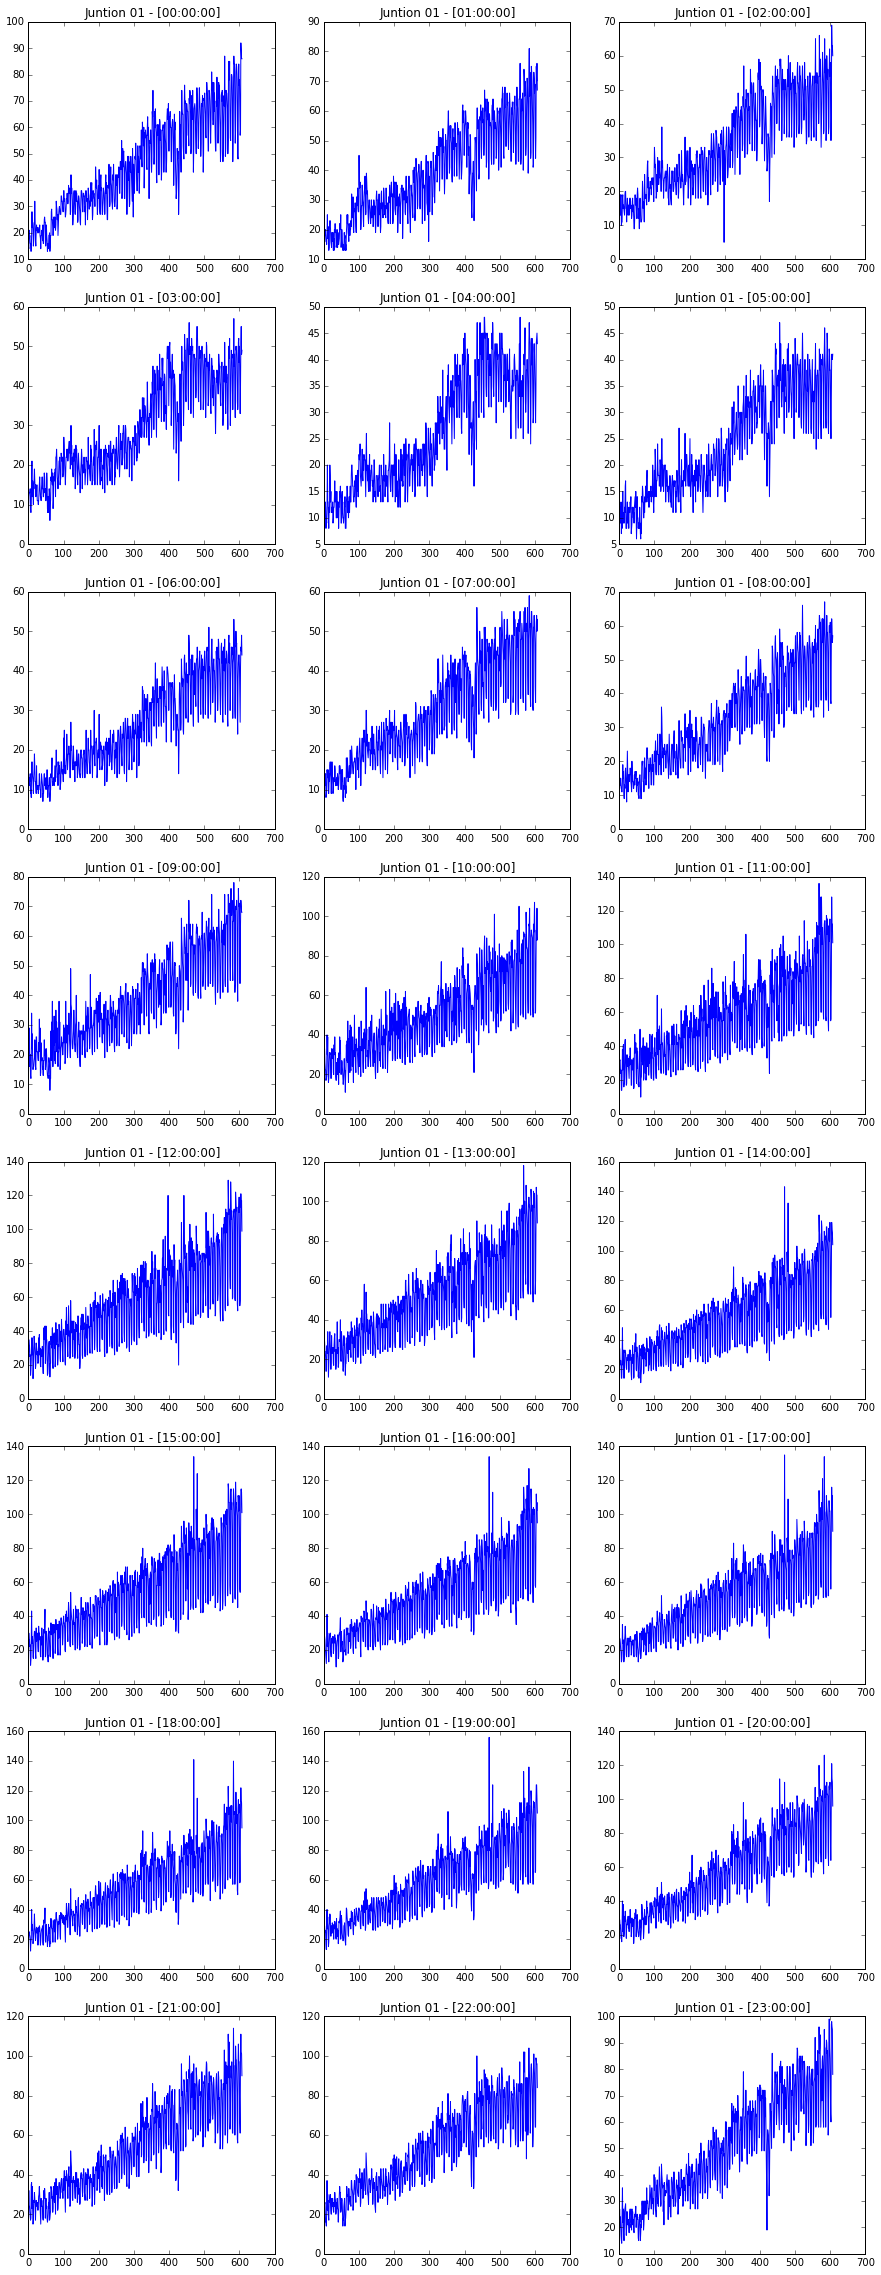

In [157]:
analysis(J1,14592)

## J2

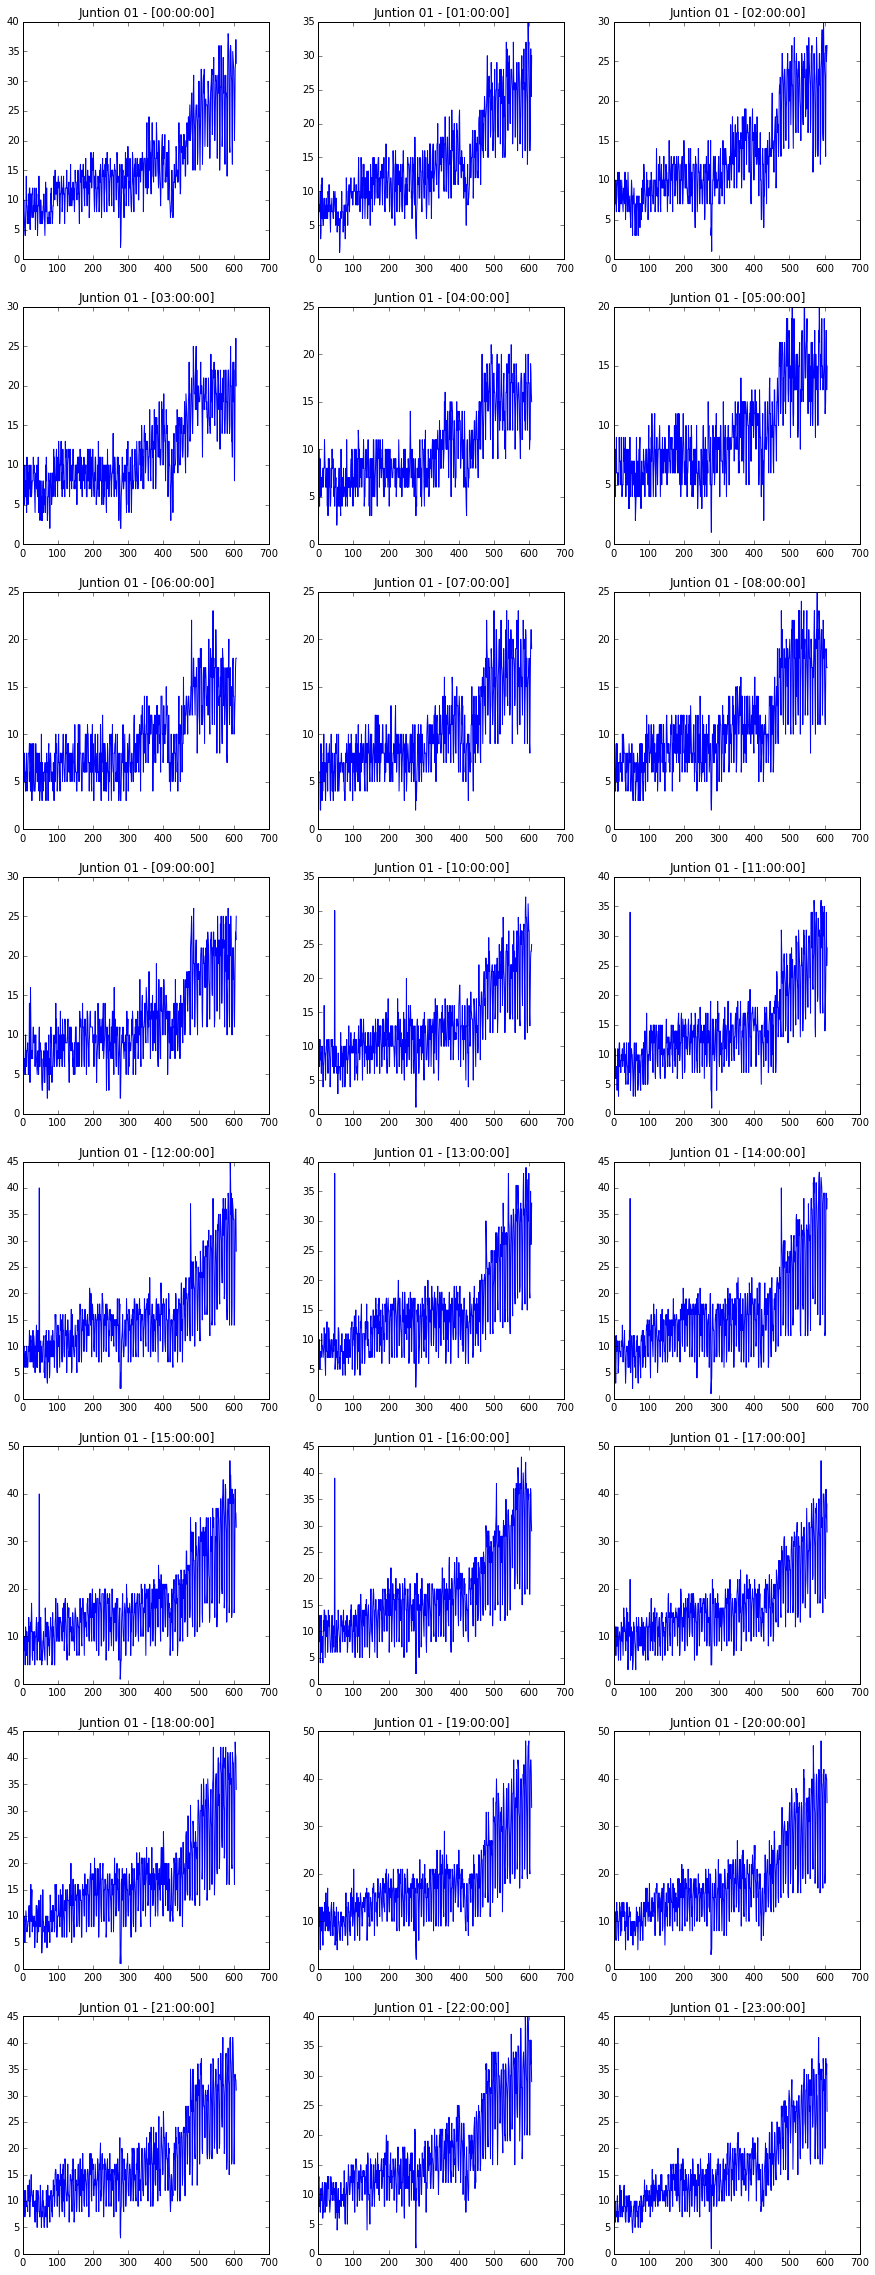

In [154]:
analysis(J2,14592)

## J3

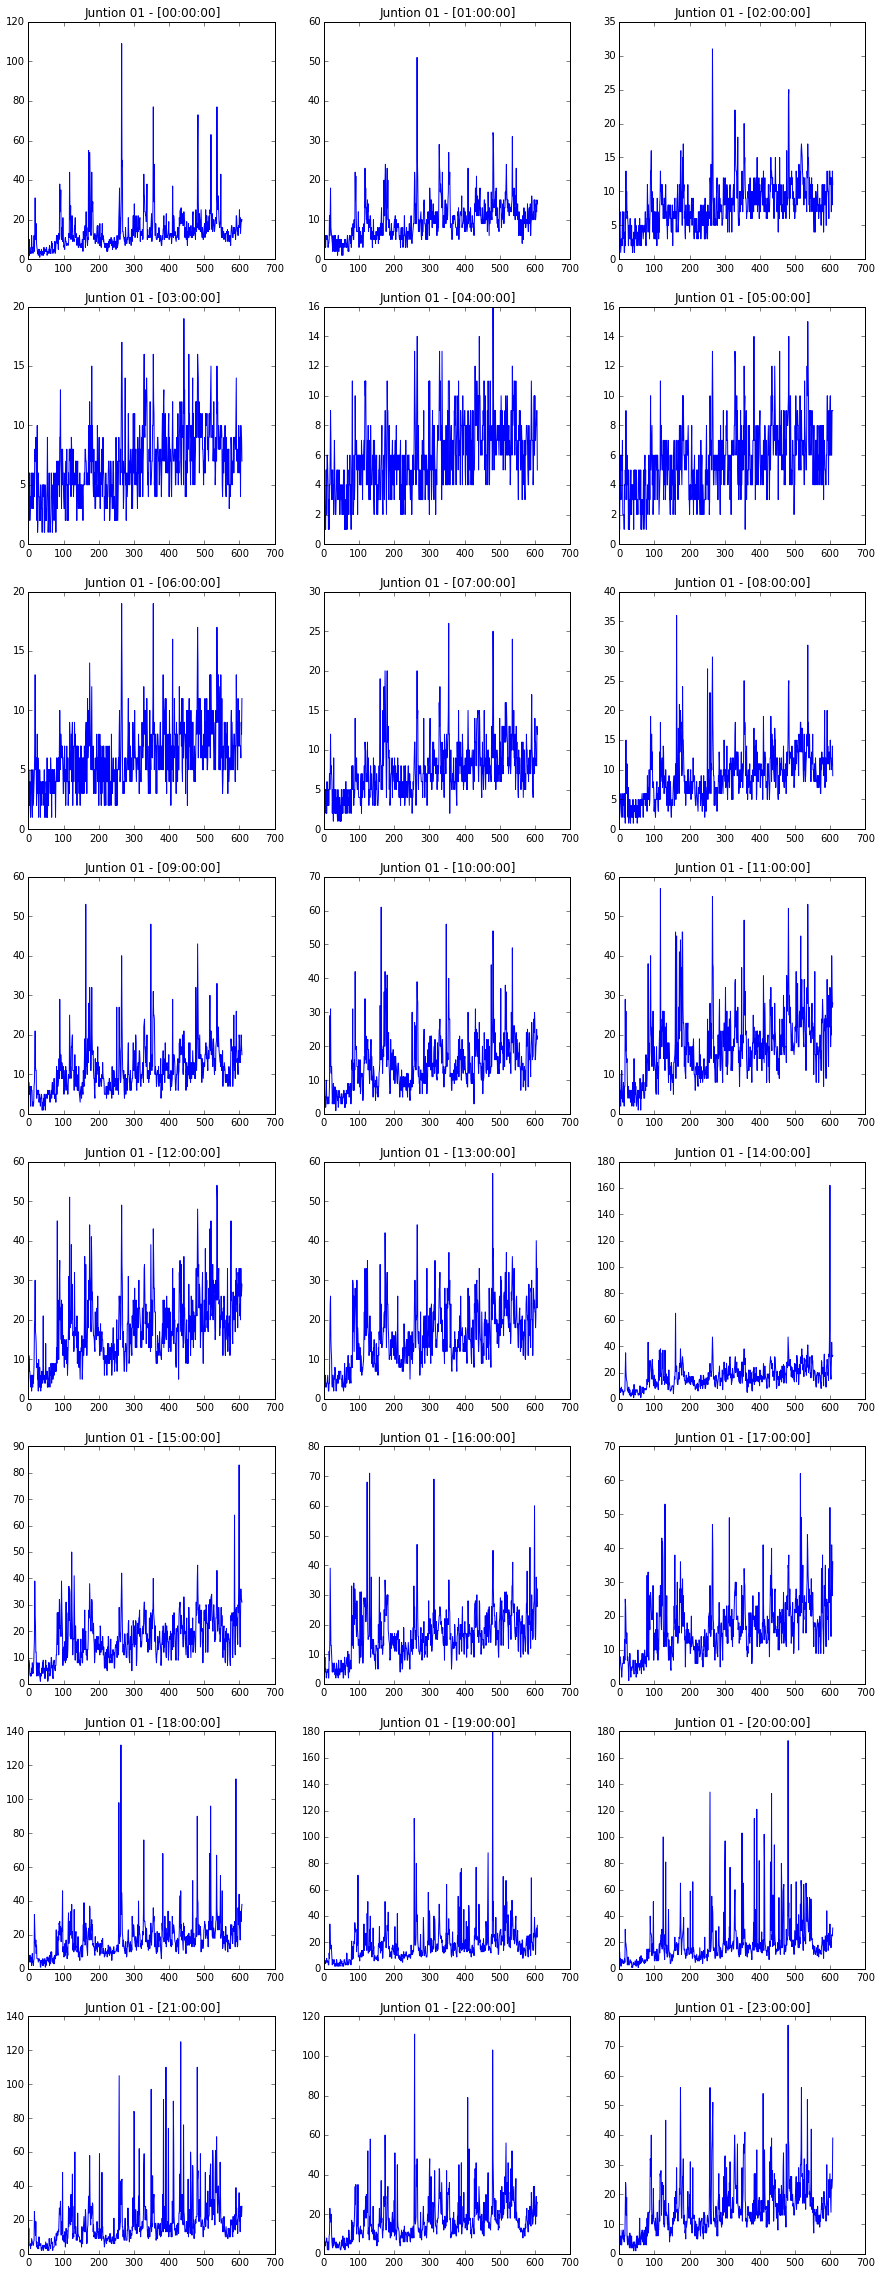

In [155]:
analysis(J3,14592)

## J4

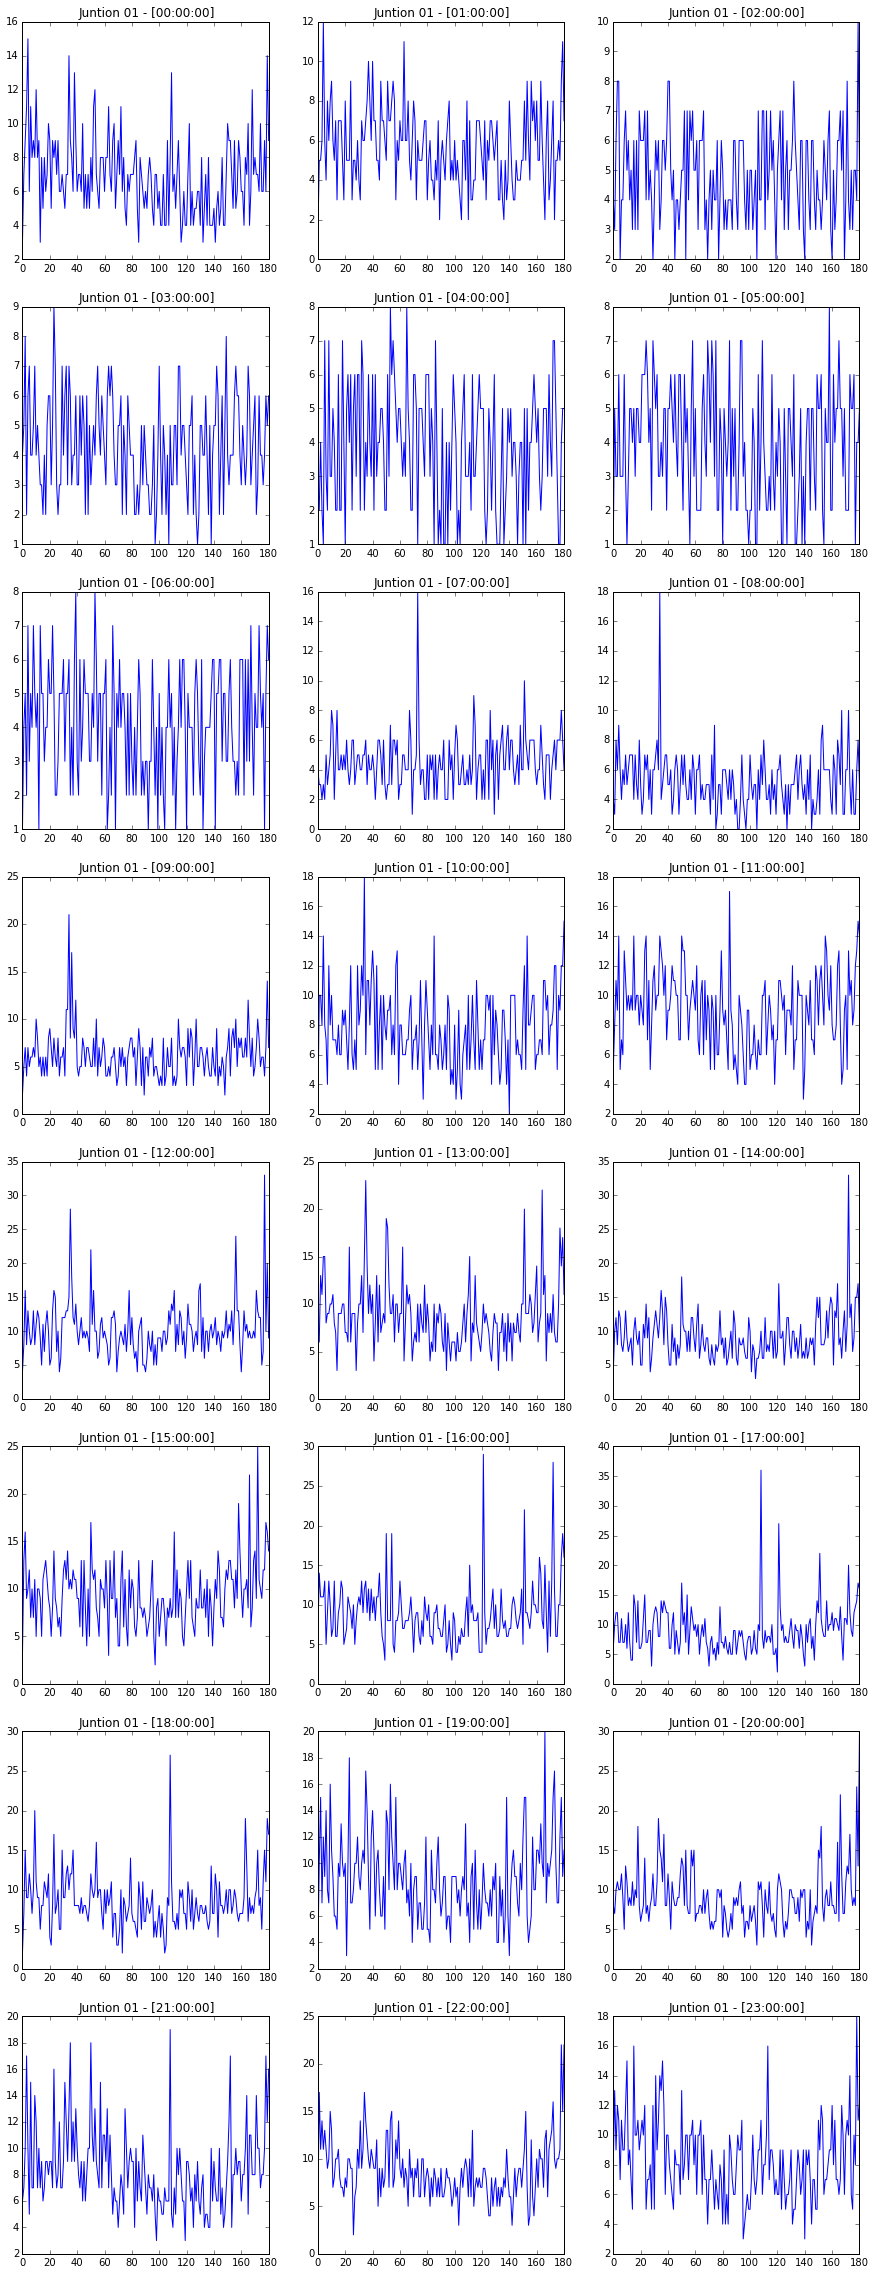

In [165]:
analysis(J4,4344)

## 1.1 Analysis of Traffic at Juntion 01at 00:00:00

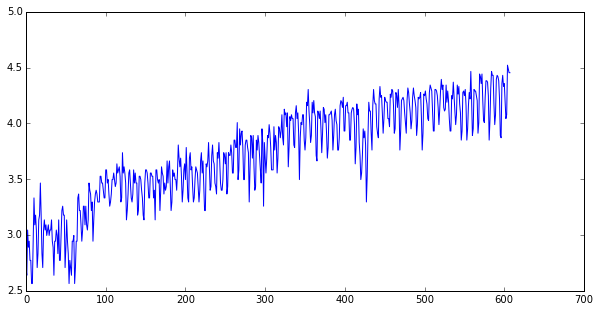

In [134]:
plt.figure(figsize=(10,5))
ts = [J1.iloc[i]['Vehicles'] for i in range(0,14592,24)]
ts = pd.DataFrame({'No.': ts})
ts_log = np.log(ts)
plt.plot(ts_log)

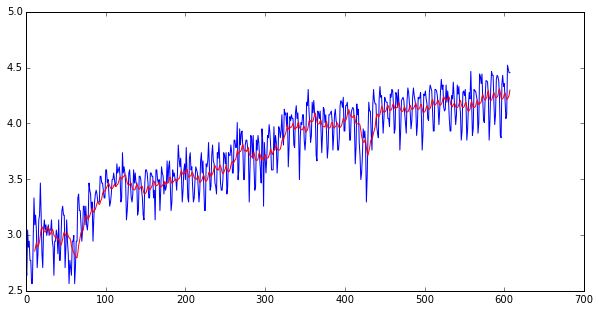

In [135]:
plt.figure(figsize=(10,5))
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [136]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,No.
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


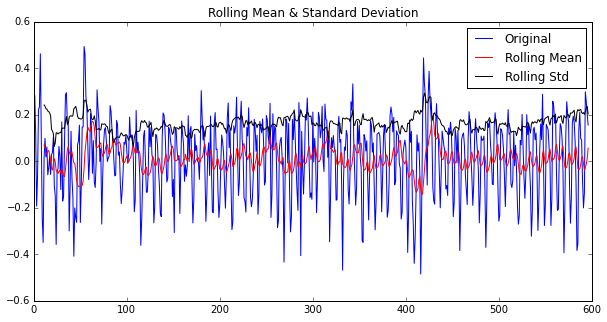

Results of Dickey-Fuller Test:
Test Statistic                -6.678160e+00
p-value                        4.410982e-09
#Lags Used                     1.500000e+01
Number of Observations Used    5.810000e+02
Critical Value (5%)           -2.866527e+00
Critical Value (1%)           -3.441655e+00
Critical Value (10%)          -2.569426e+00
dtype: float64


In [138]:
plt.figure(figsize=(10,5))
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

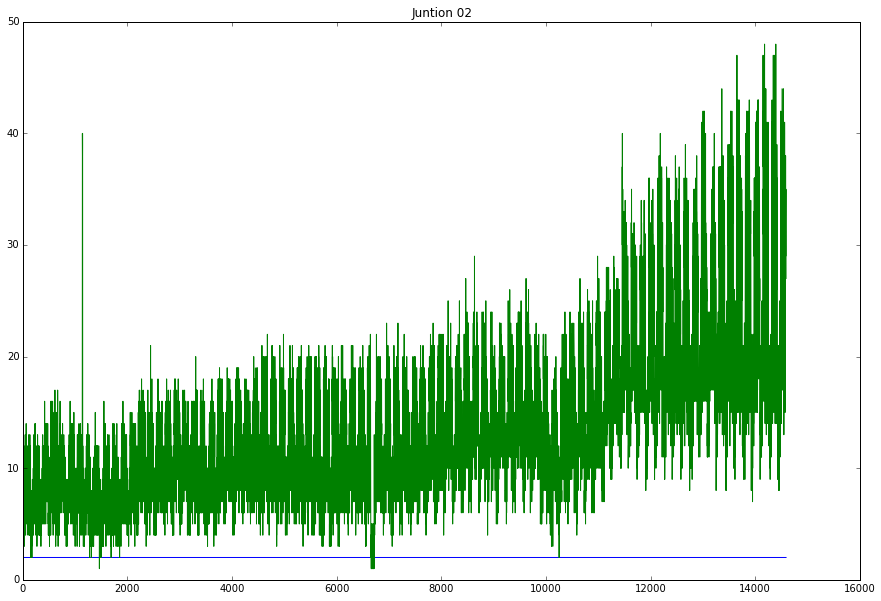

In [121]:
plt.figure(figsize=(15,10))
plt.title('Juntion 02')
plt.plot(J2)
plt.show()

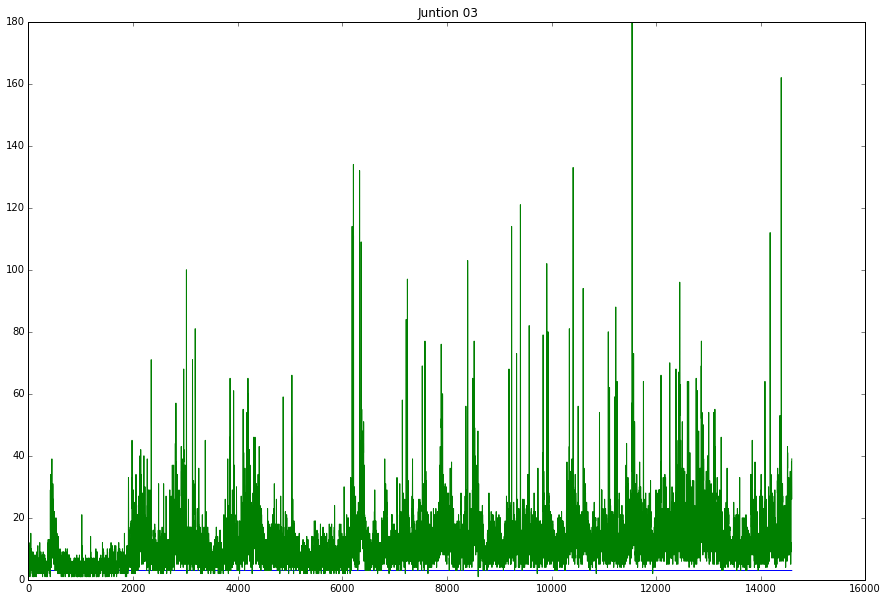

In [42]:
plt.figure(figsize=(15,10))
plt.title('Juntion 03')
plt.plot(J3)
plt.show()

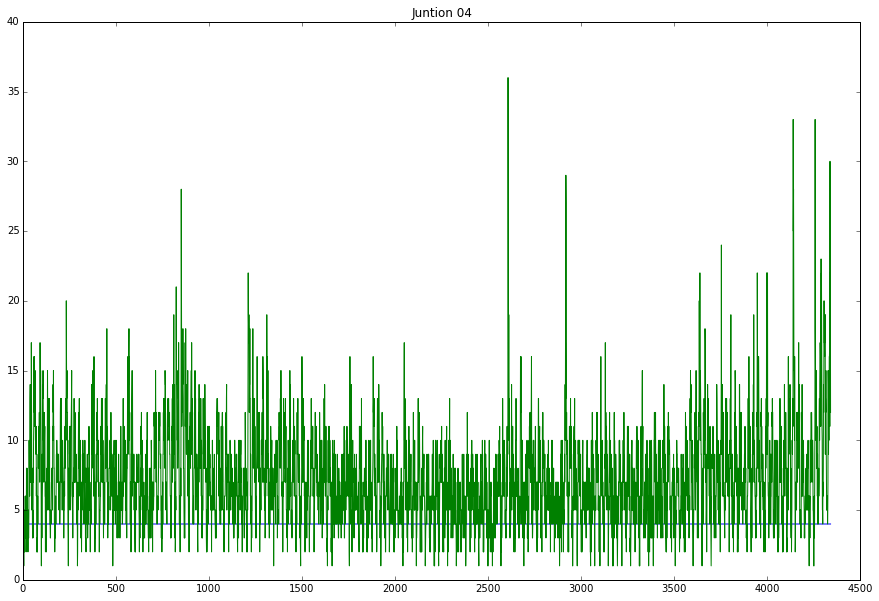

In [43]:
plt.figure(figsize=(15,10))
plt.title('Juntion 04')
plt.plot(J4)
plt.show()

## Output

In [48]:
test = pd.read_csv('test.csv')

In [49]:
test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [51]:
test.iloc[2951]

DateTime    2017-10-31 23:00:00
Junction                      1
ID                  20171031231
Name: 2951, dtype: object

In [15]:
len(test)

11808

In [44]:
11808/4

2952

In [101]:
2952/12

246

In [169]:
'''
a = [45 for x in range(1,2953)]
b = [20 for x in range(1,2953)]
c = [15 for x in range(1,2953)]
d = [10 for x in range(1,2953)]
ans = a+b+c+d
'''

'\na = [45 for x in range(1,2953)]\nb = [20 for x in range(1,2953)]\nc = [15 for x in range(1,2953)]\nd = [10 for x in range(1,2953)]\nans = a+b+c+d\n'

In [175]:
'''
j1 = result(J1,14592);
j2 = result(J2,14592);
j3 = result(J3,14592);
j4 = result(J4,4344);
'''

'\nj1 = result(J1,14592);\nj2 = result(J2,14592);\nj3 = result(J3,14592);\nj4 = result(J4,4344);\n'

In [189]:
'''
#e= [00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
a = [70,60,50,45,37,35,38,45,50,60,80,90,90,80,90,80,90,85,99,99,95,90,80,75]
b = [30,27,20,20,16,15,15,16,17,18,22,26,32,30,30,38,35,36,38,40,38,32,32,30]
c = [15,10,7,7,6,6,8,10,10,15,20,25,25,28,25,30,30,35,30,30,20,20,15,20]
d = [8,6,5,4,4,4,4,5,6,7,9,10,12,14,13,12,13,10,15,12,12,12,15,12]
ans  = a*123+b*123+c*123+d*123
'''

'\n#e= [00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23]\na = [70,60,50,45,37,35,38,45,50,60,80,90,90,80,90,80,90,85,99,99,95,90,80,75]\nb = [30,27,20,20,16,15,15,16,17,18,22,26,32,30,30,38,35,36,38,40,38,32,32,30]\nc = [15,10,7,7,6,6,8,10,10,15,20,25,25,28,25,30,30,35,30,30,20,20,15,20]\nd = [8,6,5,4,4,4,4,5,6,7,9,10,12,14,13,12,13,10,15,12,12,12,15,12]\nans  = a*123+b*123+c*123+d*123\n'

In [185]:
len(ans)

11808

In [186]:
test['Vehicles'] = ans

In [187]:
test.head()

,DateTime,Junction,ID,Vehicles
0,2017-07-01 00:00:00,1,20170701001,70
1,2017-07-01 01:00:00,1,20170701011,60
2,2017-07-01 02:00:00,1,20170701021,50
3,2017-07-01 03:00:00,1,20170701031,45
4,2017-07-01 04:00:00,1,20170701041,37


In [188]:
test.to_csv('output.csv',index=False)

In [145]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    #dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )

In [171]:
def result(J1,d):
    ans  = list()
    
    x = [J1.iloc[i]['Vehicles'] for i in range(0,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(1,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    x = [J1.iloc[i]['Vehicles'] for i in range(2,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    x = [J1.iloc[i]['Vehicles'] for i in range(3,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    x = [J1.iloc[i]['Vehicles'] for i in range(4,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    x = [J1.iloc[i]['Vehicles'] for i in range(5,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    x = [J1.iloc[i]['Vehicles'] for i in range(6,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    x = [J1.iloc[i]['Vehicles'] for i in range(7,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    x = [J1.iloc[i]['Vehicles'] for i in range(8,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(9,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(10,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(11,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(12,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(13,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(14,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(15,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(16,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(17,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(18,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(19,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(20,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    x = [J1.iloc[i]['Vehicles'] for i in range(21,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(22,d,24)]
    temp = np.mean(x)
    ans.append(temp)

    x = [J1.iloc[i]['Vehicles'] for i in range(23,d,24)]
    temp = np.mean(x)
    ans.append(temp)
    
    return ans